We are going to compare the happiness grade of different region in the dataset (ladder score)

In [33]:
# imports

import pingouin as pg
import tabulate as tb

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../dataset/2019.csv')
df.head(20)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


lets sort the data per region or country

In [35]:
# sort the data by region
df.sort_values(by ="Regional indicator")
# Show first few entries
df.head(12)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [36]:
def check_normal_dist(data):
    normal_dist = []

    for row_label in data:
        row = data[row_label]
        shapiro_t = stats.shapiro(row)
        p = shapiro_t.pvalue

        normal_dist.append([row_label, p, p > 0.05])
    print(tb.tabulate(normal_dist, headers=['name','p score','H0']))

check_normal_dist(df.drop(columns=['Country name',"Ladder score in Dystopia", 'Regional indicator'], axis = 1))

name                                            p score  H0
------------------------------------------  -----------  -----
Ladder score                                0.27414      True
Standard error of ladder score              2.14981e-09  False
upperwhisker                                0.302813     True
lowerwhisker                                0.251079     True
Logged GDP per capita                       0.000352031  False
Social support                              1.95754e-08  False
Healthy life expectancy                     6.74413e-05  False
Freedom to make life choices                0.000108443  False
Generosity                                  0.000102937  False
Perceptions of corruption                   2.47768e-12  False
Explained by: Log GDP per capita            0.000352044  False
Explained by: Social support                1.95743e-08  False
Explained by: Healthy life expectancy       6.74388e-05  False
Explained by: Freedom to make life choices  0.000108443  Fals

array([[<AxesSubplot:title={'center':'Ladder score'}>,
        <AxesSubplot:title={'center':'Standard error of ladder score'}>,
        <AxesSubplot:title={'center':'upperwhisker'}>,
        <AxesSubplot:title={'center':'lowerwhisker'}>],
       [<AxesSubplot:title={'center':'Logged GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>],
       [<AxesSubplot:title={'center':'Generosity'}>,
        <AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:title={'center':'Ladder score in Dystopia'}>,
        <AxesSubplot:title={'center':'Explained by: Log GDP per capita'}>],
       [<AxesSubplot:title={'center':'Explained by: Social support'}>,
        <AxesSubplot:title={'center':'Explained by: Healthy life expectancy'}>,
        <AxesSubplot:title={'center':'Explained by: Freedom to make life choices'}>,
  

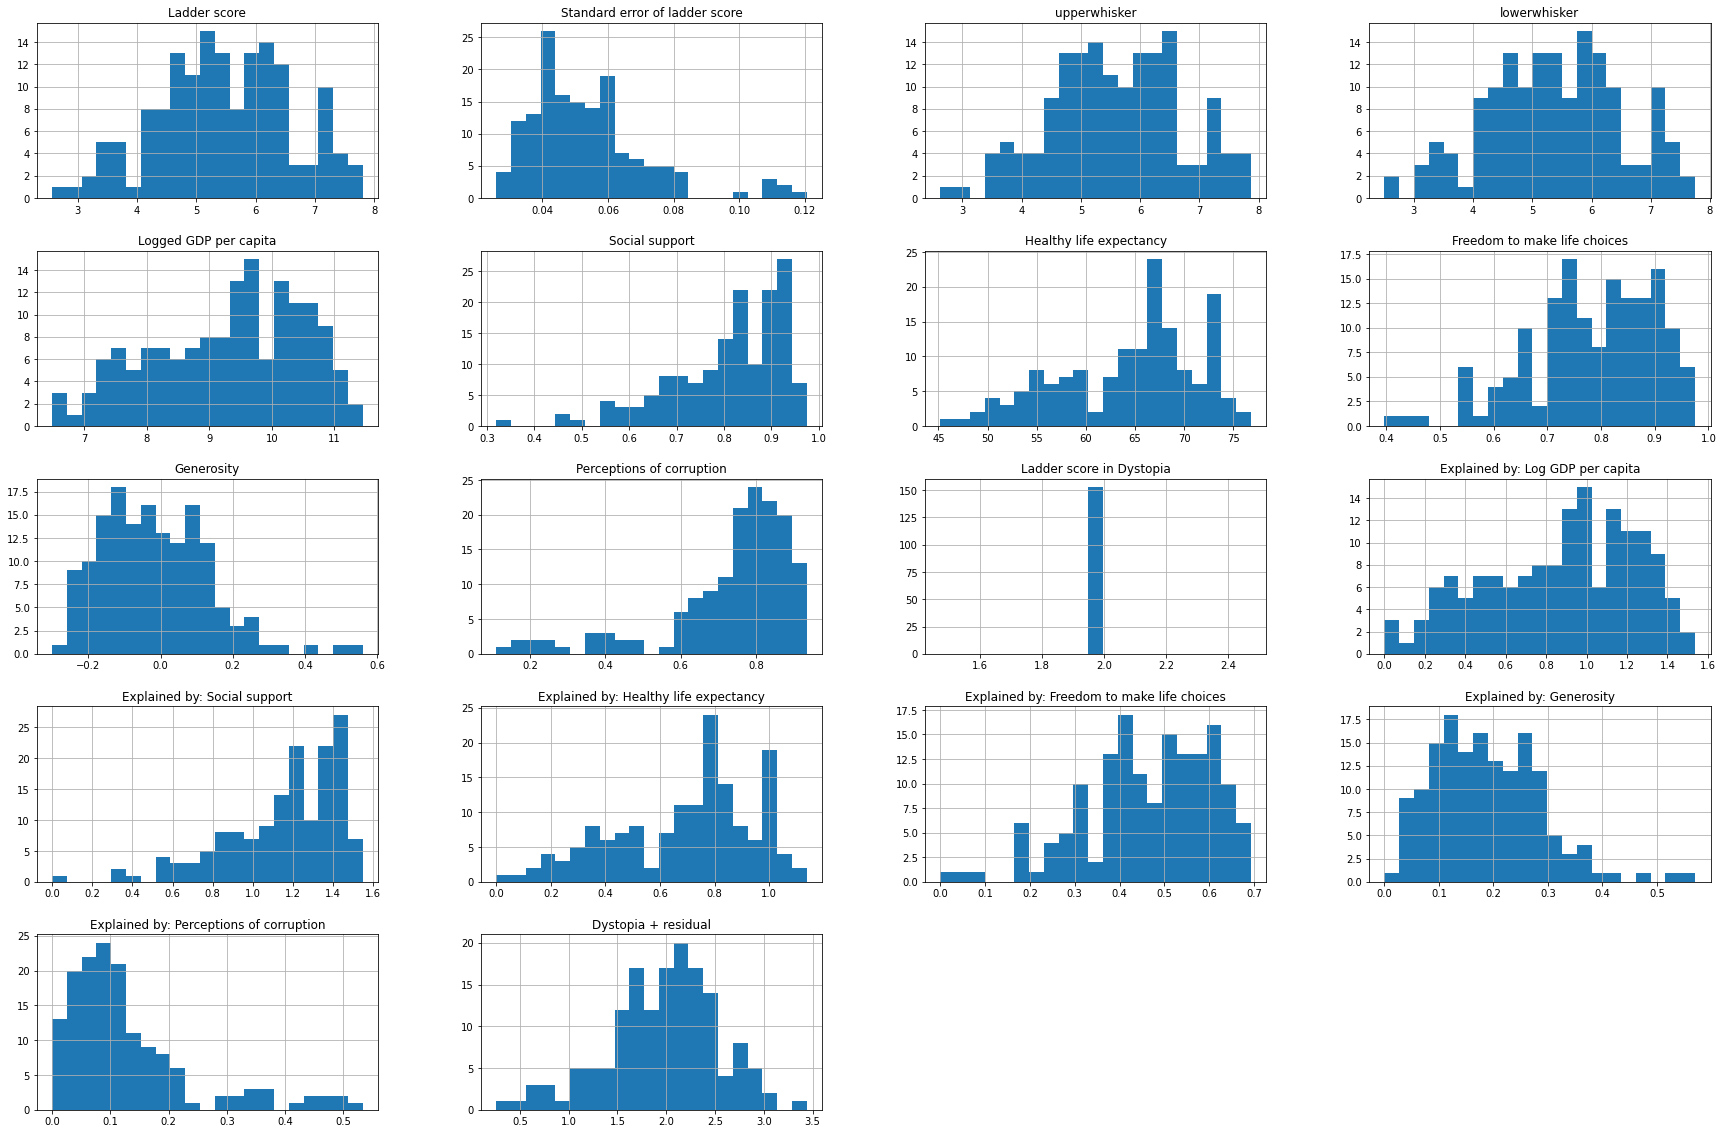

In [37]:
# histogram
df.hist(bins = 21, figsize = (30, 20))

We can check if the ladder score is normally distributed for each of the region in the dataset.

In [38]:
# Get all region types

region_types = df["Regional indicator"].unique()



 Western Europe :

name            p score  H0
------------  ---------  ----
Ladder score  0.0694147  True


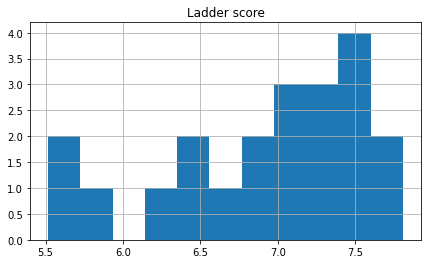



 North America and ANZ :

name            p score  H0
------------  ---------  ----
Ladder score   0.122402  True


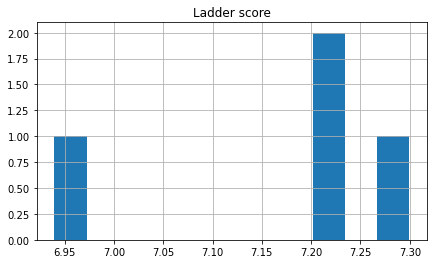



 Middle East and North Africa :

name            p score  H0
------------  ---------  ----
Ladder score   0.428593  True


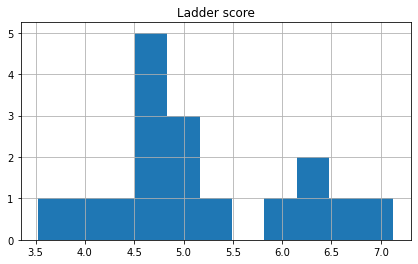



 Latin America and Caribbean :

name              p score  H0
------------  -----------  -----
Ladder score  0.000793341  False


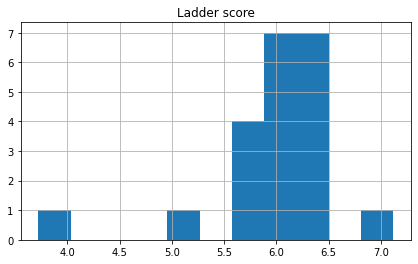



 Central and Eastern Europe :

name            p score  H0
------------  ---------  ----
Ladder score    0.72948  True


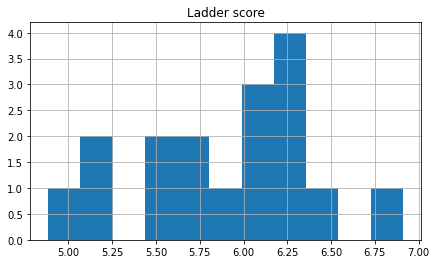



 East Asia :

name            p score  H0
------------  ---------  ----
Ladder score   0.792159  True


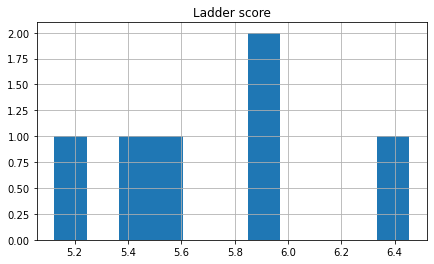



 Southeast Asia :

name            p score  H0
------------  ---------  ----
Ladder score   0.824621  True


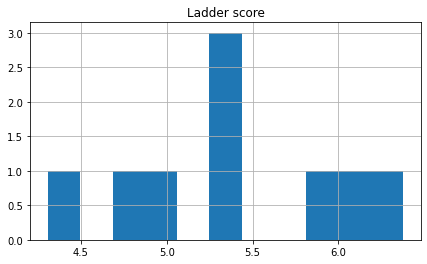



 Commonwealth of Independent States :

name            p score  H0
------------  ---------  ----
Ladder score   0.342045  True


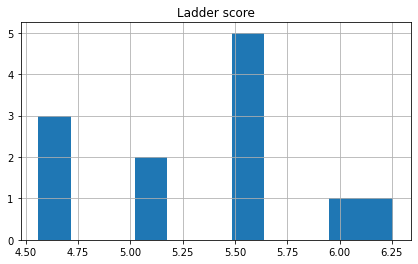



 Sub-Saharan Africa :

name            p score  H0
------------  ---------  ----
Ladder score   0.477498  True


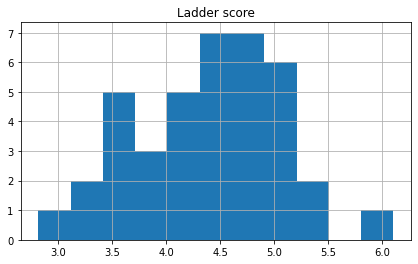



 South Asia :

name            p score  H0
------------  ---------  ----
Ladder score   0.516172  True


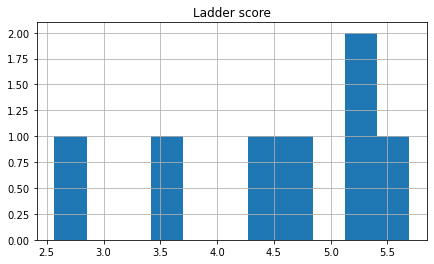

In [39]:
# Check normal distribution for each region

for region_type in region_types:
    print ("\n\n {} :\n".format(region_type))
    region_df=df.loc[df['Regional indicator'] == region_type]
    check_normal_dist(region_df[['Ladder score'] ])

    region_df.hist("Ladder score", bins = 11, figsize =(7, 4))

    plt.show()

We can see that a few regions are normally distributed, some are not.

Lets compare the variance per region for the ladder score, we'll use pandas to calculate the standard deviation and variance.


In [40]:
for region_type in region_types:
    # print region type
    print("\n {} :".format(region_type))
    region_df = df.loc[df['Regional indicator'] == region_type]

    # ddof is 1 because dataset is a sample.
    print("\t variance: {} ".format(region_df['Ladder score'].var(ddof = 1)))
    print("\t standard dev: {} ".format(region_df['Ladder score'].std(ddof=1)))


 Western Europe :
	 variance: 0.46677802762937637 
	 standard dev: 0.6832115540807081 

 North America and ANZ :
	 variance: 0.0254916274235709 
	 standard dev: 0.15966097652078576 

 Middle East and North Africa :
	 variance: 0.9764654474433635 
	 standard dev: 0.9881626624414441 

 Latin America and Caribbean :
	 variance: 0.4358814444887962 
	 standard dev: 0.6602131810928923 

 Central and Eastern Europe :
	 variance: 0.2740371179305071 
	 standard dev: 0.5234855470120519 

 East Asia :
	 variance: 0.21109565004811479 
	 standard dev: 0.4594514664772709 

 Southeast Asia :
	 variance: 0.4314730040819299 
	 standard dev: 0.6568660472896509 

 Commonwealth of Independent States :
	 variance: 0.2878610598453386 
	 standard dev: 0.53652684913743 

 Sub-Saharan Africa :
	 variance: 0.4665587143747747 
	 standard dev: 0.6830510335068491 

 South Asia :
	 variance: 1.1747909366310572 
	 standard dev: 1.0838777314028816 


We can see that the variance for each region can be quite different.

Students t-test

Here we perform the student's T-test, in this test we can see if there is a statistically significant
 difference between two datasets

We check each region that is normally distributed, for the t-test we will use the pingouin library.
The result will show us if there is a difference in happiness for those two regions.

In [45]:
region_1 = df.loc[df['Regional indicator']=='Central and Eastern Europe']
region_2 = df.loc[df['Regional indicator']=='East Asia']

pg.ttest(region_1['Ladder score'],region_2['Ladder score'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.745993,9.976887,two-sided,0.472882,"[-0.34, 0.67]",0.331979,0.5,0.102419


In [42]:
region_1=df.loc[df['Regional indicator']=='Sub-Saharan Africa']
region_2=df.loc[df['Regional indicator']=='Middle East and North Africa']

pg.ttest(region_1['Ladder score'],region_2['Ladder score'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.202454,22.939812,two-sided,0.003964,"[-1.39, -0.3]",1.073497,15.585,0.952273


In [46]:
region_1 = df.loc[df['Regional indicator']=='Central and Eastern Europe']
region_2 = df.loc[df['Regional indicator']=='Commonwealth of Independent States']

pg.ttest(region_1['Ladder score'],region_2['Ladder score'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.623832,23.465871,two-sided,0.015035,"[0.11, 0.94]",0.993644,3.942,0.719307


We look at the P value (p-val), if the P value is smaller then 0.05 we can say with 95% certainty that their is a significant difference between the happieness in the 2 regions.

From thes tests we can only say this for the difference in the regions ‘Sub-Saharan Africa’ and ‘Middle East and North Africa’ and between the regions ‘Central and Eastern Europe’ and ‘Commonwealth of Independent States’

This does mean that in some cases their IS a difference in happieness depending on the region where one lives


by looking at p-val (P value), if it's smaller than 0.05, there is a 95% certainty there is a significant distinction between the two regions

From the results of the ttest we can conclude there is a significant difference between the following regions
** "Middle East and North Africa" and "Sub-Saharan Africa"
** "Central and Eastern Europe" and "Commonwealth of Independent States

Therefor we can conclude there could be a difference in happiness depending on region
